In [2]:
## Importing the required python libraries 
import os, sys
import warnings
import timeit
import numpy as np
import pandas as pd 
import pkg_resources
import matplotlib.pyplot as plt
import re
import seaborn as sns
from collections import defaultdict


In [3]:
## Plot the number of genes with less than 5 transposons in all mutants 

pergene_files=[]
#data_dir= "../satay/data_files/data_unmerged/"
#data_dir="../transposonmapper/data_files/files4test/"
data_dir="../postprocessed-data/"
#data_dir="../transposonmapper/data_files/"
for root, dirs, files in os.walk(data_dir):
    for file in files:
        if file.endswith("pergene_insertions.xlsx"):
            pergene_files.append(os.path.join(root, file))

In [4]:
list_data=[]
for i in pergene_files:
    list_data.append(pd.read_excel(i,engine='openpyxl',index_col="Unnamed: 0"))

In [5]:
keys=[]
for i in np.arange(0,len(pergene_files)):
    keys.append(pergene_files[i].split("/")[-1].split("_")[0]+"_"+pergene_files[i].split("/")[-1].split("_")[1])

In [6]:
list_data_pd=pd.concat(list_data,axis=0,keys=keys)

In [7]:
list_data_pd.head(2)

Gene name Chromosome  Start location  End location  \
dbem3_b 0    YAL069W          I             335           649   
        1  YAL068W-A          I             538           792   

                                         Insertion locations  \
dbem3_b 0  [336, 340, 349, 372, 377, 382, 386, 386, 387, ...   
        1  [559, 561, 564, 565, 569, 570, 570, 571, 573, ...   

                                Reads per insertion location  Reads  \
dbem3_b 0  [3, 327, 87, 1, 3, 12, 39, 1, 43, 6, 3, 45, 1,...   2353   
        1  [6, 1, 2, 2, 147, 9, 154, 17, 177, 1, 132, 5, ...    694   

           Insertions  
dbem3_b 0          55  
        1          25

In [98]:
# Number of genes with less than 2 transposons and 2 reads in all mutants
Q=[]
for i in np.arange(0,len(keys)):
    tmp=(list_data_pd.loc[keys[i]])
    #L.append(len(tmp[(tmp.loc[:,"Insertions"]<5) & (tmp.loc[:,"Reads"]<2)]))
    Q.append(len(tmp[(tmp.loc[:,"Insertions"]<5)]))



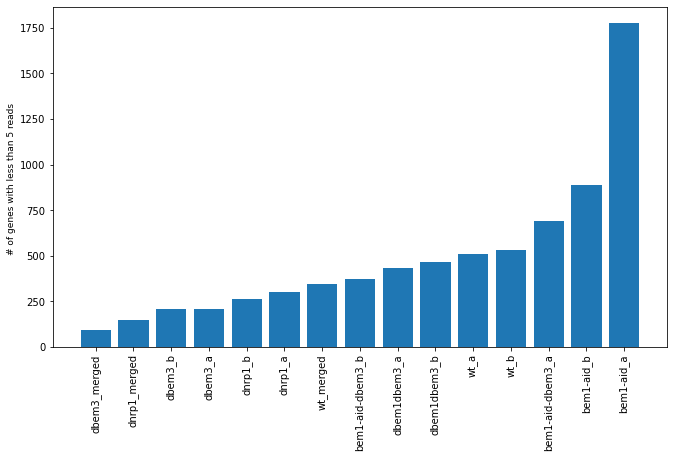

In [99]:
Q_dict=dict(zip(keys,Q))

A={k: v for k, v in sorted(Q_dict.items(), key=lambda item: item[1])}

fig = plt.figure(figsize=(10, 7))
plt.bar(A.keys(),A.values())
plt.xticks(rotation=90);

plt.ylabel("# of genes with less than 5 reads ",fontsize=9)
plt.tight_layout(pad=3)
#plt.savefig("../figures/fig_number_genes_with_less_than_5_reads.png",dpi=300)


/tmp/ipykernel_13002/1718796362.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(labels=A.keys(),rotation=90);
/tmp/ipykernel_13002/1718796362.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(labels=B.keys(),rotation=90);


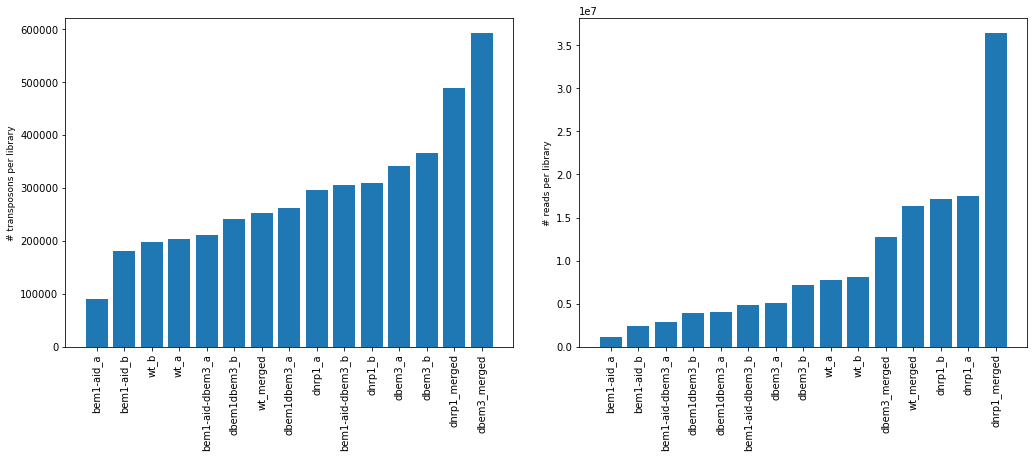

In [100]:
# Number of transposons in each library 
L=[]
R=[]
for i in np.arange(0,len(keys)):
    tmp=(list_data_pd.loc[keys[i]])
    L.append(np.sum(tmp.loc[:,"Insertions"]))
    R.append(np.sum(tmp.loc[:,"Reads"]))

    
L_dict=dict(zip(keys,L))
R_dict=dict(zip(keys,R))

A={k: v for k, v in sorted(L_dict.items(), key=lambda item: item[1])}
B={k: v for k, v in sorted(R_dict.items(), key=lambda item: item[1])}

fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(15, 7))
axes[0].bar(A.keys(),A.values())
axes[0].set_xticklabels(labels=A.keys(),rotation=90);
axes[0].set_ylabel("# transposons per library",fontsize=9)

axes[1].bar(B.keys(),B.values())
axes[1].set_xticklabels(labels=B.keys(),rotation=90);
axes[1].set_ylabel("# reads per library",fontsize=9)

#plt.savefig("../figures/fig_number_insertions_and_reads_for_all_libraries.png",dpi=300)

plt.tight_layout(pad=3)

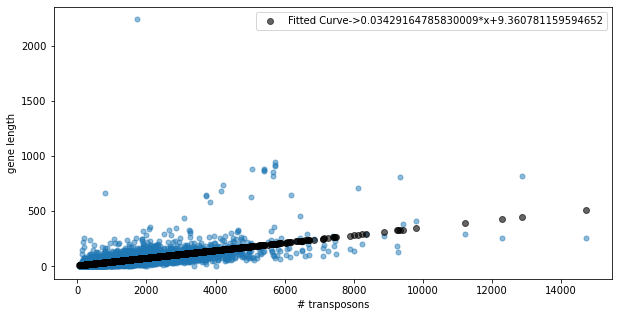

In [24]:
## Plot length of genes vs number of transposons
from scipy.optimize import curve_fit

def func(x, a,b):
    return a*x +b

fig,axes = plt.subplots(nrows=1,ncols=1,figsize=(10, 5))

data=list_data_pd.loc[keys[0]]
xaxis=(data.loc[:,"End location"]-data.loc[:,"Start location"])

plt.plot(xaxis,data.loc[:,"Insertions"],"o",markersize=5,alpha=0.5)

x = np.array(xaxis)
popt, pcov = curve_fit(func, x, np.array(data.loc[:,"Insertions"]))
plt.plot(x, func(x, *popt), 'ko', label="Fitted Curve->" + str(popt[0]) + '*x+'+str(popt[1]),alpha=0.6)

plt.ylabel("gene length")
plt.xlabel("# transposons")
plt.legend()
plt.savefig("../figures/fig_length_vs_number_of_transposons.png",dpi=300)

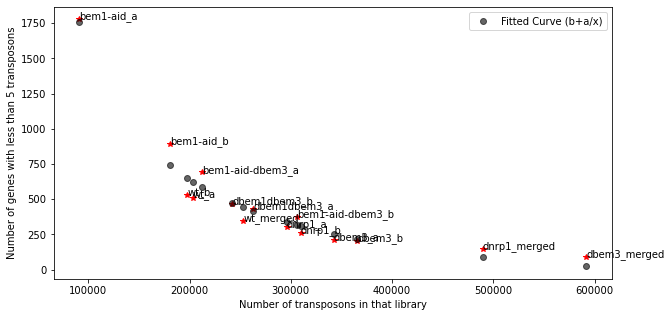

In [112]:
## Plot the number of genes with less than 5 transposons in all mutants over the total number of transposons per library
from scipy.optimize import curve_fit

fig,axes = plt.subplots(nrows=1,ncols=1,figsize=(10, 5))
l_array=[]
q_array=[]
for keys in L_dict.keys():
    axes.plot(L_dict[keys],Q_dict[keys],'*r')
    axes.annotate(keys,(L_dict[keys],Q_dict[keys]))
    l_array.append(L_dict[keys])
    q_array.append(Q_dict[keys])

def func(x, a,b):
    return b+a / x

x = np.array(l_array)

popt, pcov = curve_fit(func, x, np.array(q_array))
axes.plot(x, func(x, *popt), 'ko', label="Fitted Curve (b+a/x)",alpha=0.6)

axes.set_xlabel("Number of transposons in that library")
axes.set_ylabel("Number of genes with less than 5 transposons")
axes.legend()
fig.savefig("../figures/number_of_tr_less_than_5_vs_total_number_of_tr.png",dpi=300)

In [6]:
from module_intergenic_model import adding_features2dataframe,getting_r

list_data_extended=[]
for i in np.arange(0,len(keys)):
    tmp=(list_data_pd.loc[keys[i]])
    list_data_extended.append(adding_features2dataframe(tmp))



/data/localhome/linigodelacruz/Documents/PhD_2018/Documentation/SATAY/src(source-code)/Data-analysis-multiple-strains/src/module_intergenic_model.py:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["tr-density"]=np.nan
/data/localhome/linigodelacruz/Documents/PhD_2018/Documentation/SATAY/src(source-code)/Data-analysis-multiple-strains/src/module_intergenic_model.py:95: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["reads-per-tr"]=np.nan
/data/localhome/linigodelacruz/Documents/PhD_2018/Documentat

In [7]:
list_data_extended_pd=pd.concat(list_data_extended,axis=0,keys=keys)

/tmp/ipykernel_9698/4034657550.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(labels=A.keys(),rotation=90);
/tmp/ipykernel_9698/4034657550.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(labels=B.keys(),rotation=90);


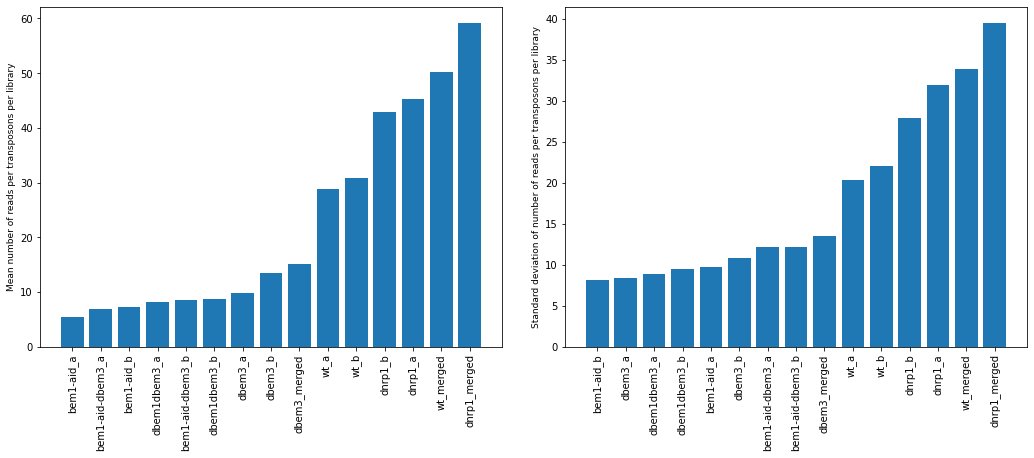

In [8]:
# Number of reads per transposons per library
L=[]
R=[]
for i in np.arange(0,len(keys)):
    tmp=(list_data_extended_pd.loc[keys[i]])
    L.append(tmp.loc[:,"reads-per-tr"].mean())
    R.append(tmp.loc[:,"reads-per-tr"].std())

L_dict=dict(zip(keys,L))
R_dict=dict(zip(keys,R))

A={k: v for k, v in sorted(L_dict.items(), key=lambda item: item[1])}
B={k: v for k, v in sorted(R_dict.items(), key=lambda item: item[1])}

fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(15, 7))
axes[0].bar(A.keys(),A.values())
axes[0].set_xticklabels(labels=A.keys(),rotation=90);
axes[0].set_ylabel("Mean number of reads per transposons per library",fontsize=9)

axes[1].bar(B.keys(),B.values())
axes[1].set_xticklabels(labels=B.keys(),rotation=90);
axes[1].set_ylabel("Standard deviation of number of reads per transposons per library",fontsize=9)

plt.tight_layout(pad=3)
plt.savefig("../figures/fig_mean_and_std_number_reads_per_transposons_per_library.png",dpi=300)

In [9]:
list_data_rates=[]
for i in np.arange(0,len(keys)):
    tmp=(list_data_extended_pd.loc[keys[i]])
    list_data_rates.append(getting_r(tmp))



/data/localhome/linigodelacruz/anaconda3/envs/transposonmapper/lib/python3.9/site-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(
/data/localhome/linigodelacruz/anaconda3/envs/transposonmapper/lib/python3.9/site-packages/pandas/core/frame.py:5176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
/data/localhome/linigodelacruz/anaconda3/envs/transposonmapper/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/data/localhome/linigodelac

In [10]:
rates_dict=dict(zip(keys,list_data_rates))

rates_norm_dict=defaultdict(dict)

for i in np.arange(0,len(keys)):
    tmp=(rates_dict[keys[i]])
    if rates_dict["wt_merged"]!=0:
        rates_norm_dict[keys[i]]["rates-intergenic"]=np.divide(tmp,rates_dict["wt_merged"])[0]
    else:
        rates_norm_dict[keys[i]]["rates-intergenic"]=tmp[0]

/tmp/ipykernel_9698/1871766839.py:8: RuntimeWarning: invalid value encountered in true_divide
  rates_norm_dict[keys[i]]["rates-intergenic"]=np.divide(tmp,rates_dict["wt_merged"])[0]


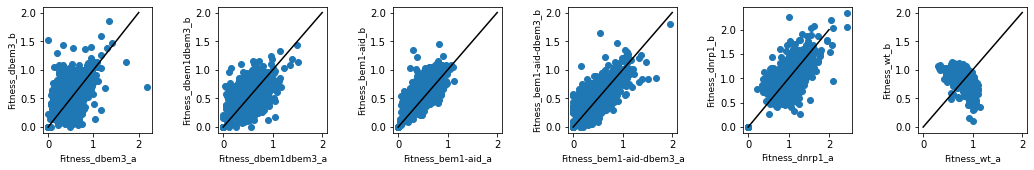

In [54]:
## Fitness plots  normalized to the values of wt_merged

keys_fitness=["dbem3_a","dbem3_b", "dbem1dbem3_a", "dbem1dbem3_b",
"bem1-aid_a","bem1-aid_b","bem1-aid-dbem3_a", "bem1-aid-dbem3_b",
"dnrp1_a","dnrp1_b", "wt_a", "wt_b"]
plt.subplots(nrows=1,ncols=6,figsize=(15, 3))
j=1
for i in np.arange(0,len(keys_fitness),2):
    plt.subplot(1,6,j)
    plt.scatter(rates_norm_dict[keys_fitness[i]],rates_norm_dict[keys_fitness[i+1]])
    plt.plot(np.arange(0,2.1,0.1),np.arange(0,2.1,0.1),color="black")
   
    plt.ylabel("Fitness_" + keys_fitness[i+1],fontsize=9)
    plt.xlabel("Fitness_" + keys_fitness[i],fontsize=9)
    plt.tight_layout(pad=3)
    
    j=j+1
#plt.savefig("../figures/fig_fitness_scatter_normalized_wt_merged.png",dpi=300)

/data/localhome/linigodelacruz/anaconda3/envs/transposonmapper/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/data/localhome/linigodelacruz/anaconda3/envs/transposonmapper/lib/python3.9/site-packages/numpy/core/function_base.py:151: RuntimeWarning: invalid value encountered in multiply
  y *= step
/data/localhome/linigodelacruz/anaconda3/envs/transposonmapper/lib/python3.9/site-packages/numpy/core/function_base.py:161: RuntimeWarning: invalid value encountered in add
  y += start
/data/localhome/linigodelacruz/anaconda3/envs/transposonmapper/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1395: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
/data/localhome/linigodel

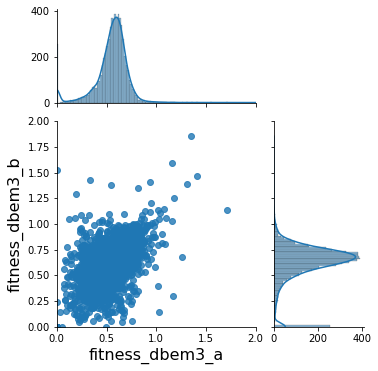

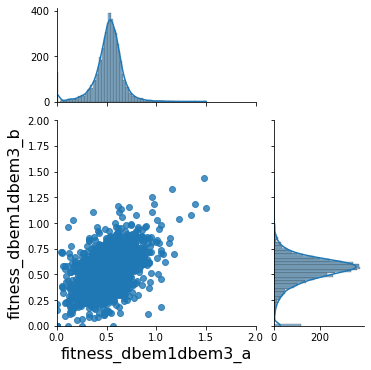

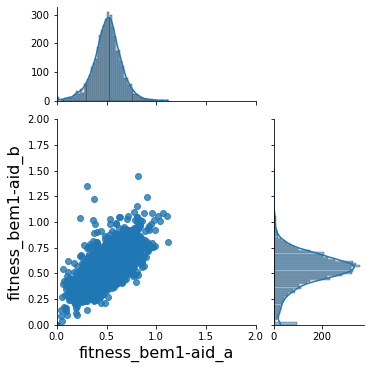

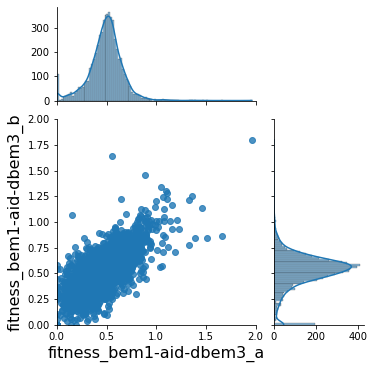

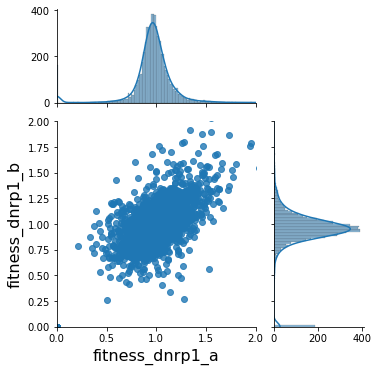

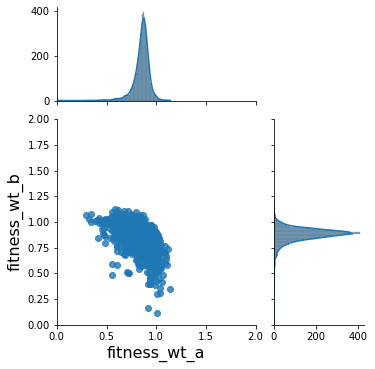

In [73]:
rates_norm_dict_pd=pd.DataFrame.from_dict(rates_norm_dict,orient="columns")

keys_fitness=["dbem3_a","dbem3_b", "dbem1dbem3_a", "dbem1dbem3_b",
"bem1-aid_a","bem1-aid_b","bem1-aid-dbem3_a", "bem1-aid-dbem3_b",
"dnrp1_a","dnrp1_b", "wt_a", "wt_b"]

for i in np.arange(0,len(keys_fitness),2):
    
    g=sns.jointplot(rates_norm_dict_pd.loc[:,keys_fitness[i]][0],rates_norm_dict_pd.loc[:,keys_fitness[i+1]][0],
    kind="reg",height=5, ratio=2, marginal_ticks=True)
    g.set_axis_labels('fitness_'+keys_fitness[i], 'fitness_'+keys_fitness[i+1], fontsize=16)
    g.ax_joint.set_xlim(0,2)
    g.ax_joint.set_ylim(0,2)
    g.savefig("../figures/fig_fitness_jointplot_normalized_"+keys_fitness[i]+"_"+keys_fitness[i+1]+".png",dpi=300)

In [107]:
from from_excel_to_list import from_excel_to_list
list_data_extended_pd=pd.concat(list_data_extended,axis=0,keys=keys)
list_data_rates_pd=list_data_extended_pd.copy()
for i in np.arange(0,len(keys)):
    list_data_rates_pd.loc[keys[i],"rates-intergenic"]=rates_norm_dict[keys[i]]["rates-intergenic"]

# Convert reads per location to numeric arrays
list_data_rates_pd.loc[keys[0],"Reads per insertion location"][0]=from_excel_to_list(list_data_rates_pd.loc[keys[0],"Reads per insertion location"][0])

# TO DO:
# - Replace the column "Reads per insertion location" with a numeric array
# - Replace the colum "Insertion locations" with a numeric array
# - Implement the uncertainty of the rates

/tmp/ipykernel_4636/3752089735.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  list_data_rates_pd.loc[keys[0],"Reads per insertion location"][0]=from_excel_to_list(list_data_rates_pd.loc[keys[0],"Reads per insertion location"][0])


3.0

In [ ]:
#%% uncertainty related to the rates 
## expand this expression : np.log(N*K/(K-N))/T taking into account that N=p/q
## uncertainty of p= std(p) per gene and uncertainty of q= 1-density(q) 


# data=data_wt_extended
# T=90
# #cte=T*np.sum(data["reads-per-tr"])
# cte=np.sum(data["reads-per-tr"])
# P=data["reads-per-tr"]/cte
# uncertainty_r=[]
# for i in data.index:
#     p=data["Reads per insertion location"][i]
#     q=data["tr-density"][i]
#     uncertainty_r.append(P[i]*np.sqrt((np.std(p)/data["reads-per-tr"][i])**2+((1-q)/q)**2))

# data["uncertainty_r"]=uncertainty_r

In [ ]:
# Implement the std of the fitness values

